# Logistic regression for Risk Analyst project

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("Logistic regression_dataset.xlsx")

In [3]:
df.head()

,LoanID,BAD,MORTDUE,VALUE,JOB Other,JOB ProfExe,JOB Office,JOB Mgr,JOB Self,YOJ,DEROG (0 or 1),DELINQ(0 or 1),CLAGE in years,NINQ,CLNO,DTI,LTV
0,1,1,25860.0,39025.0,1,0,0,0,0,10.5,0,0,7.863889,1,9.0,0.352500,0.662652
1,2,1,70053.0,68400.0,1,0,0,0,0,7.0,0,1,10.152778,0,14.0,0.352500,1.024167
2,3,1,13500.0,16700.0,1,0,0,0,0,4.0,0,0,12.455556,1,10.0,0.352500,0.808383
3,5,0,97800.0,112000.0,0,0,1,0,0,3.0,0,0,7.777778,0,14.0,0.352500,0.873214
4,6,1,30548.0,40320.0,1,0,0,0,0,9.0,0,0,8.455500,1,8.0,0.371136,0.757639


In [4]:
df.shape

(5442, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5442 entries, 0 to 5441
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LoanID          5442 non-null   int64  
 1   BAD             5442 non-null   int64  
 2   MORTDUE         5442 non-null   float64
 3   VALUE           5442 non-null   float64
 4   JOB Other       5442 non-null   int64  
 5   JOB ProfExe     5442 non-null   int64  
 6   JOB Office      5442 non-null   int64  
 7   JOB Mgr         5442 non-null   int64  
 8   JOB Self        5442 non-null   int64  
 9   YOJ             5442 non-null   float64
 10  DEROG (0 or 1)  5442 non-null   int64  
 11  DELINQ(0 or 1)  5442 non-null   int64  
 12  CLAGE in years  5442 non-null   float64
 13  NINQ            5442 non-null   int64  
 14  CLNO            5442 non-null   float64
 15  DTI             5442 non-null   float64
 16  LTV             5442 non-null   float64
dtypes: float64(7), int64(10)
memory u

There are no null values as they were already handled in excel.

In [6]:
df.describe()

,LoanID,BAD,MORTDUE,VALUE,JOB Other,JOB ProfExe,JOB Office,JOB Mgr,JOB Self,YOJ,DEROG (0 or 1),DELINQ(0 or 1),CLAGE in years,NINQ,CLNO,DTI,LTV
count,5442.000000,5442.000000,5442.000000,5442.000000,5442.000000,5442.000000,5442.000000,5442.000000,5442.000000,5442.000000,5442.000000,5442.000000,5442.000000,5442.000000,5442.000000,5442.000000,5442.000000
mean,3000.323594,0.199008,71566.093752,102782.592193,0.419331,0.231165,0.162440,0.135796,0.033076,8.784399,0.123300,0.210033,14.803240,1.109151,21.736494,0.344522,0.690548
std,1698.251617,0.399291,37203.654400,45890.317520,0.493495,0.421616,0.368888,0.342603,0.178852,7.182921,0.328812,0.407369,6.365411,1.343103,9.203634,0.056909,0.150632
min,1.000000,0.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.210375,0.352591
25%,1543.250000,0.000000,46276.000000,69132.250000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,9.844816,0.000000,16.000000,0.313280,0.617614
50%,3009.500000,0.000000,65019.000000,92435.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,14.500000,1.000000,21.000000,0.352500,0.716750
75%,4456.750000,0.000000,91488.000000,124061.500000,1.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,18.868056,2.000000,27.000000,0.381883,0.794295
max,5960.000000,1.000000,159306.000000,206455.375000,1.000000,1.000000,1.000000,1.000000,1.000000,28.000000,1.000000,1.000000,32.402916,5.000000,43.500000,0.484788,1.059317


In [10]:
df.columns

Index(['LoanID', 'BAD', 'MORTDUE', 'VALUE', 'JOB Other', 'JOB ProfExe',
       'JOB Office', 'JOB Mgr', 'JOB Self', 'YOJ', 'DEROG (0 or 1)',
       'DELINQ(0 or 1)', 'CLAGE in years', 'NINQ', 'CLNO', 'DTI', 'LTV'],
      dtype='object')

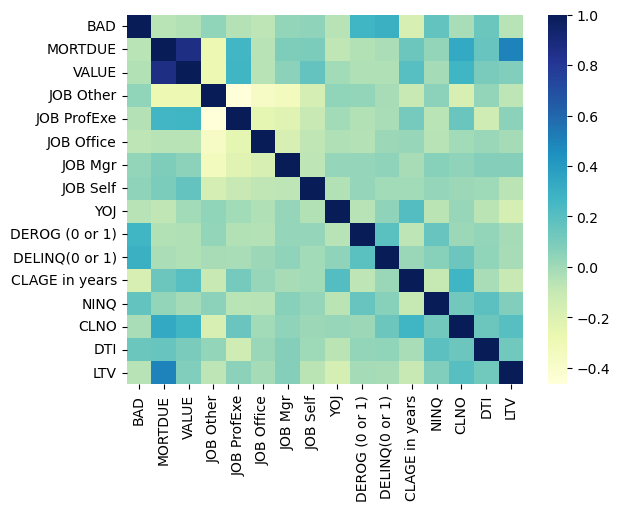

In [14]:
# checking correlations
sns.heatmap(df[['BAD', 'MORTDUE', 'VALUE', 'JOB Other', 'JOB ProfExe',
       'JOB Office', 'JOB Mgr', 'JOB Self', 'YOJ', 'DEROG (0 or 1)',
       'DELINQ(0 or 1)', 'CLAGE in years', 'NINQ', 'CLNO', 'DTI', 'LTV']].corr(), cmap="YlGnBu")
plt.show()

The strongest positive correlations between target and variables: DREOG (Number of major derogatory reports) and DELINQ (Number of deliquent cradit lines), NINQ (Number of receny credit inquiries) and DTI. The strongest negative correlation - CLAGE (Age of oldest credit line).

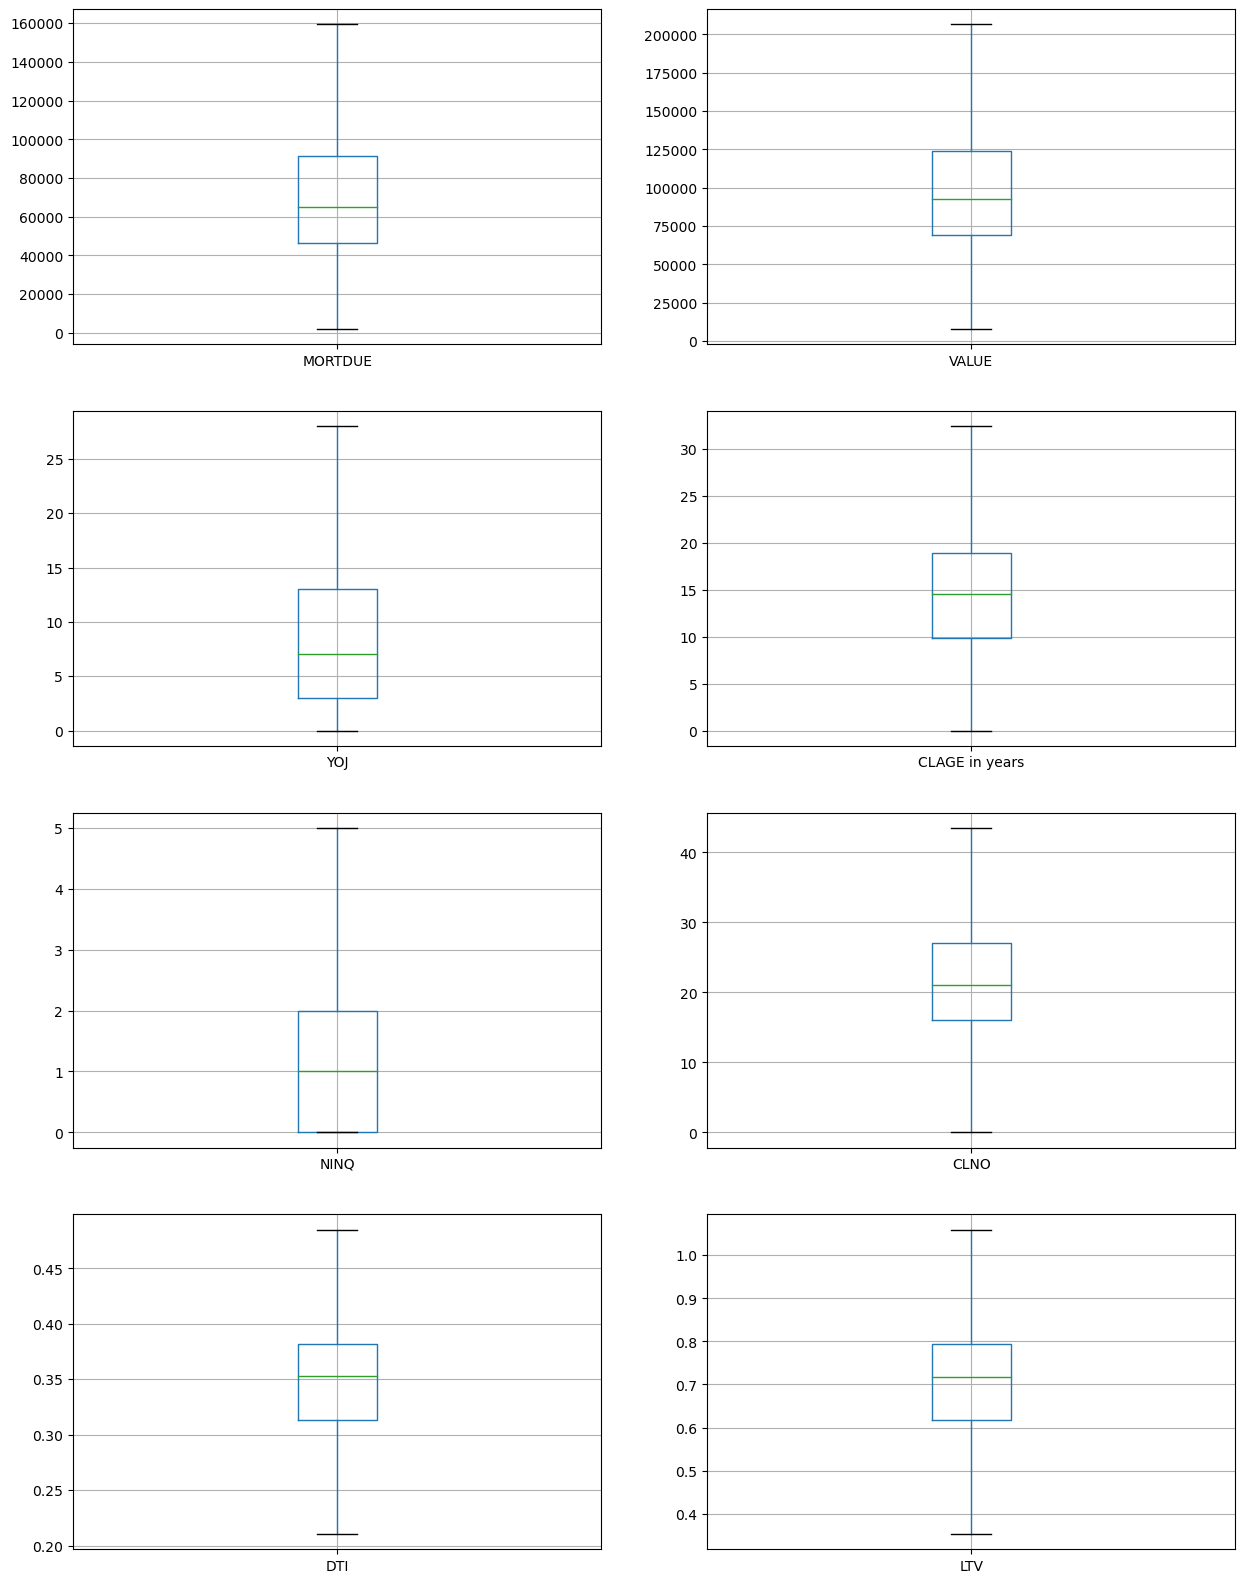

In [22]:
# boxplots for outliers visualisation
plt.figure(figsize=(15, 20))

continuous_variables = ['MORTDUE', 'VALUE', 'YOJ', 'CLAGE in years', 'NINQ', 'CLNO', 'DTI', 'LTV']

index = 0
for name in continuous_variables:
  index += 1
  plt.subplot(4, 2, index)
  fig = df.boxplot(column = name)

There are no outliers in continous variables as they were winsorized already in excel.

In [24]:
import statsmodels.api as sm

In [30]:
# Splitting the data into predictors (X) and target variable (y)
X = df.drop(columns=['LoanID','BAD'])
y = df['BAD']

In [57]:
# Performing backward stepwise selection - dropping highest p-value in each step
def backward_selection(X, y, columns):
    while len(columns) > 0:
        X_ = sm.add_constant(X[columns])
        model = sm.Logit(y, X_).fit(disp=0)
        max_pvalue = model.pvalues.drop('const').max()
        if max_pvalue > 0.05:
            remove_column = model.pvalues.drop('const').idxmax()
            columns.remove(remove_column)
        else:
            break
    return model, columns

selected_columns = list(X.columns)
model, selected_columns = backward_selection(X, y, selected_columns)

In [58]:
# Fit the final logistic regression model
X_selected = sm.add_constant(X[selected_columns])
final_model = sm.Logit(y, X_selected).fit()

# Summary of the final model
final_model.summary()

Optimization terminated successfully.
         Current function value: 0.399625
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    BAD   No. Observations:                 5442
Model:                          Logit   Df Residuals:                     5428
Method:                           MLE   Df Model:                           13
Date:                Tue, 12 Mar 2024   Pseudo R-squ.:                  0.1992
Time:                        11:59:53   Log-Likelihood:                -2174.8
converged:                       True   LL-Null:                       -2715.7
Covariance Type:            nonrobust   LLR p-value:                4.533e-223
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.1832      0.414     -2.857      0.004      -1.995      -0.371
JOB Other         -1.1600      0.246     -4.723      0.000      -1.641      -0.679
JOB ProfExe       -1.0304      0.252     -4.095      0.000      -1.524      -0.537
JOB Office        -1.6901      0.262     -6.450      0.000      -2.204      -1.176
JOB Mgr           -1.0574      0.257     -4.107      0.000      -1.562      -0.553
JOB Self          -0.5991      0.300     -1.997      0.046      -1.187      -0.011
YOJ               -0.0139      0.006     -2.361      0.018      -0.025      -0.002
DEROG (0 or 1)     1.2145      0.099     12.329      0.000       1.021       1.408
DELINQ(0 or 1)     1.5982      0.085     18.733      0.000       1.431       1.765
CLAGE in years    -0.0757      0.007    -10.966      0.000      -0.089      -0.062
NINQ               0.1834      0.027      6.741      0.000       0.130       0.237
CLNO              -0.0147      0.005     -3.212      0.001      -0.024      -0.006
DTI                7.4954      0.783      9.571      0.000       5.961       9.030
LTV               -1.6089      0.263     -6.118      0.000      -2.124      -1.094
==================================================================================
"""

In [33]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, recall_score, precision_score, f1_score, fbeta_score

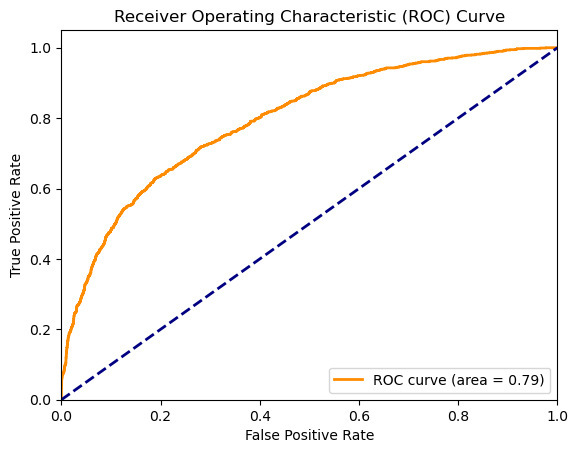

In [59]:
# Calculate predicted probabilities for the final model
y_pred_proba = final_model.predict(X_selected)

from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, recall_score, precision_score, f1_score, fbeta_score, roc_auc_score

# Calculate predicted probabilities for the final model
y_pred_proba = final_model.predict(X_selected)

# Prepare cutoffs
cutoffs = [0.1 * i for i in range(10)]

# Initialize lists to store evaluation metrics
auc_scores = []
accuracies = []
recalls = []
precisions = []
specificities = []
f1_scores = []
f2_scores = []

# Prepare confusion matrices for each cutoff and calculate evaluation metrics
for cutoff in cutoffs:
    y_pred_class = (y_pred_proba > cutoff).astype(int)
    conf_matrix = confusion_matrix(y, y_pred_class)
    auc_scores.append(roc_auc_score(y, y_pred_proba))
    accuracies.append(accuracy_score(y, y_pred_class))
    recalls.append(recall_score(y, y_pred_class))
    precisions.append(precision_score(y, y_pred_class))
    f1_scores.append(f1_score(y, y_pred_class))
    f2_scores.append(fbeta_score(y, y_pred_class, beta=2))
    specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
    specificities.append(specificity)

# Plot ROC curve
fpr, tpr, _ = roc_curve(y, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [60]:
# Create a dictionary to store the evaluation metrics
metrics_dict = {
    "Cutoff": cutoffs,
    "AUC": auc_scores,
    "Accuracy": accuracies,
    "Recall": recalls,
    "Precision": precisions,
    "Specificity": specificities,
    "F1 Score": f1_scores,
    "F2 Score": f2_scores}

# Create a DataFrame from the dictionary
metrics_df = pd.DataFrame(metrics_dict)
metrics_df

,Cutoff,AUC,Accuracy,Recall,Precision,Specificity,F1 Score,F2 Score
0,0.0,0.794948,0.199008,1.000000,0.199008,0.000000,0.331954,0.554021
1,0.1,0.794948,0.548328,0.896584,0.292734,0.461803,0.441364,0.634723
2,0.2,0.794948,0.739985,0.675900,0.407572,0.755907,0.508510,0.597258
3,0.3,0.794948,0.808159,0.538319,0.517303,0.875201,0.527602,0.533981
4,0.4,0.794948,0.825064,0.415512,0.585176,0.926818,0.485961,0.441090
5,0.5,0.794948,0.826167,0.299169,0.634051,0.957100,0.406524,0.334503
6,0.6,0.794948,0.824881,0.206833,0.704403,0.978435,0.319772,0.240860
7,0.7,0.794948,0.818817,0.129271,0.765027,0.990135,0.221169,0.155039
8,0.8,0.794948,0.812753,0.064635,0.921053,0.998624,0.120794,0.079401
9,0.9,0.794948,0.803197,0.011080,1.000000,1.000000,0.021918,0.013812


In [61]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Initialize logistic regression model
logreg = LogisticRegression()

# Perform cross-validation and calculate AUC scores
cv_auc_scores = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')

# Print the AUC scores for each fold
print("AUC scores for each fold:", cv_auc_scores)

# Calculate the mean AUC score across all folds
mean_auc_score = cv_auc_scores.mean()
print("Mean AUC score:", mean_auc_score)

AUC scores for each fold: [0.63412146 0.67089798 0.53118138 0.52574435 0.4635629 ]
Mean AUC score: 0.5651016174337622


### Conclusions

1. The model was trained on preprocessed data set: 

- missing values inputted using exact calculation or median for continuous variables, MOD (most frequently occurring category) for nominal variables,

- outliers in continues variables handled using winsorization technique or converting variable into categorical with nominal data type,

- categorical variables converted into n-1 dummy variables.

2. The dataset balance in predicted variable was 20% of 1s to 80% of 0s, which was sufficient proportion for running the logistic regression.


3. The model will not be used on unseen data, the purpose of the logistic regression is to model PD (Probability of Default) for the provided loans portfolio. Therefore the data set has not been divided into training and testing set, as the problem of overfitting will not apply to this case, and entire dataset has been used for training the model. 


4. Initially the model was trained on 15 variables. Using backward stepwise regression, by eliminating the least statistically significant variable in each step, the final model has 13 variables: JOB Other, JOB ProfExe,JOB Office, JOB Mgr, JOB Self, YOJ, DEROG (0 or 1), DELINQ(0 or 1), CLAGE in years, NINQ, CLNO, DTI, LTV, which are all statistically significant. Those variables also had the strongest correlation with the predicted variable.


5. The ROC AUC score of the model is 0,795. Other evaluation metrics (Accuracy, Recall, Precision, Specificity, F1 and F2 score) depend on the cutoff threshold. 

6. The highest Accuracy of 0,826 the model presents at the 0,5 threshold. The highest F1 score 0,528 (the best balance between Recall and Precision) is at 0,3  threshold. Since, the purpose of the logistic regression is receiving probabilities rather than classify instances, determining cutoff point is not necessary in this step. However determining cutoff point in the probability of default may be required to define areas of the expected loss (EL) and the unexpected loss (UL), where the regulatory capital should be held. Under IRB approach bank can provide own definition of defaulted loan, for which determining cutoff in default probability might be useful. In such case at cutoff 0,9 the model provides score 1 for Precision and Specificity, which means that at this cutoff all positive and all negative instances where correctly identified (there are no incorrectly identified positive cases and no incorrectly identified negative cases).